# Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [2]:
# connect your google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fer2013_dataset_file_path = 'drive/My Drive/Project/fer2013.csv'

In [4]:
train_images = []
train_labels = []

val_images = []
val_labels = []

test_images = []
test_labels = []

with open(fer2013_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(csv_reader):
    if row_id == 0:
      continue
    label = np.zeros(7)
    label[int(row[0])] = 1

    image = list(map(int, row[1].split(' ')))
    
    if row[2] == 'Training':
      train_labels.append(label)
      train_images.append(image)
    elif row[2] == 'PublicTest':
      test_labels.append(label)
      test_images.append(image)
    elif row[2] == 'PrivateTest':
      val_labels.append(label)
      val_images.append(image)

train_labels = np.asarray(train_labels, dtype=np.float32)
train_images = np.asarray(train_images, dtype=np.float32).reshape(-1, 48, 48, 1)

val_labels = np.asarray(val_labels, dtype=np.float32)
val_images = np.asarray(val_images, dtype=np.float32).reshape(-1, 48, 48, 1)

test_labels = np.asarray(test_labels, dtype=np.float32)
test_images = np.asarray(test_images, dtype=np.float32).reshape(-1, 48, 48, 1)


In [5]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

print('Val images:', val_images.shape)
print('Val labels:', val_labels.shape)

print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: (28709, 48, 48, 1)
Train labels: (28709, 7)
Val images: (3589, 48, 48, 1)
Val labels: (3589, 7)
Test images: (3589, 48, 48, 1)
Test labels: (3589, 7)


In [6]:
# normalization
train_images /= 255
val_images /= 255
test_images /= 255

# Print Data Instance

In [7]:
emotions = {
    0: 'Angry', 
    1: 'Disgust',
    2: 'Fear', 
    3: 'Happy',
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'
}

Label array: [0. 0. 1. 0. 0. 0. 0.] 
Label: 2 
Emotion: Fear 
Image shape: (48, 48, 1)


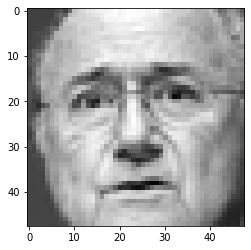

In [8]:
index = 5
print('Label array:', train_labels[index], '\nLabel:', np.argmax(train_labels[index]),
      '\nEmotion:', emotions[np.argmax(train_labels[index])],
      '\nImage shape:', train_images[index].shape)
plt.imshow(train_images[index].reshape(48, 48), cmap='gray')
plt.show()

# Prepare Model

In [9]:
input_shape = (48, 48, 1)
num_labels = 7

num_features = 64

# model = Sequential()

# model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))

# model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(1000, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(num_labels, activation='softmax'))

# model.summary()

model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))



In [10]:
batch_size = 512
epochs = 45

#Compliling the model with adam optimixer and categorical crossentropy loss
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

#training the model
train_history = model.fit(
    train_images, train_labels, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(val_images, val_labels), 
    verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/45
57/57 [==============================] - 23s 271ms/step - loss: 9.5795 - accuracy: 0.1854 - val_loss: 8.8361 - val_accuracy: 0.2449
Epoch 2/45
57/57 [==============================] - 12s 203ms/step - loss: 9.0398 - accuracy: 0.2202 - val_loss: 8.5517 - val_accuracy: 0.2449
Epoch 3/45
57/57 [==============================] - 12s 203ms/step - loss: 8.6314 - accuracy: 0.2459 - val_loss: 8.2832 - val_accuracy: 0.1764
Epoch 4/45
57/57 [==============================] - 12s 204ms/step - loss: 8.2172 - accuracy: 0.2765 - val_loss: 7.9923 - val_accuracy: 0.2449
Epoch 5/45
57/57 [==============================] - 12s 204ms/step - loss: 7.8171 - accuracy: 0.3040 - val_loss: 7.6156 - val_accuracy: 0.2641
Epoch 6/45
57/57 [==============================] - 12s 206ms/step - loss: 7.4371 - accuracy: 0.3213 - val_loss: 7.3012 - val_accuracy: 0.3043
Epoch 7/45
57/57 [==============================] - 12s 207ms/step - loss: 7.0676 - accuracy: 0.3449 - val_loss: 7.0005 - val_accuracy: 0.2483

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Loss:', loss, '\nAccuracy:', accuracy * 100, '%')

113/113 [==============================] - 1s 7ms/step - loss: 1.8959 - accuracy: 0.6074
Loss: 1.8958934545516968 
Accuracy: 60.741156339645386 %
